# Cloudbutton Mandelbrot set calculation example
## Serverless matrix multiplication

In [this notebook](https://github.com/lithops-cloud/applications/blob/master/mandelbrot/example_mandelbrot.ipynb) we will calculate the Mandelbrot set on a limited space several times using the Cloudbutton toolkit. We will treat a certain region of the linear space as a matrix and we will divide it into chunks in order to
be able to distribute them among many functions. For each step, we will plot the corresponding image generated from the matrix.

In [5]:
import numpy as np
from math import sqrt
from matplotlib import colors
from matplotlib import pyplot as plt
from lithops.multiprocessing import Pool

%matplotlib notebook

### Partitioning
We slice the matrix into many chunks (as many as concurrency) so that each function will treat one of these. Thus, function arguments will be the limits or boundaries of a chunk.

In [6]:
def parallel_mandelbrot(xmin, xmax, ymin, ymax, width, height, 
                     maxiter, concurrency):

    blocks_per_row = sqrt(concurrency)
    assert blocks_per_row == int(blocks_per_row), "concurrency must be square number"
    blocks_per_row = int(blocks_per_row)
    y_step = (ymax - ymin) / blocks_per_row
    x_step = (xmax - xmin) / blocks_per_row
    mat_block_sz = int(width / blocks_per_row)

    limits = []
    indexes = []
    for i in range(blocks_per_row):
        for j in range(blocks_per_row):
            limits.append((xmin + i*x_step, xmin + (i + 1)*x_step,
                            ymin + j*y_step, ymin + (j + 1)*y_step))
            indexes.append((i*mat_block_sz, (i + 1)*mat_block_sz,
                            j*mat_block_sz, (j + 1)*mat_block_sz))

    def mandelbrot_chunk_fn(limit, maxiter):
        rx = np.linspace(limit[0], limit[1], mat_block_sz)
        ry = np.linspace(limit[2], limit[3], mat_block_sz)
        c = rx + ry[:,None]*1j
        output = np.zeros((mat_block_sz, mat_block_sz))
        z = np.zeros((mat_block_sz, mat_block_sz), np.complex64)

        for it in range(maxiter+1):
            notdone = np.less(z.real*z.real + z.imag*z.imag, 4.0)
            output[notdone] = it
            z[notdone] = z[notdone]**2 + c[notdone]

        return output.T

    with Pool() as pool:
        iterdata = [(limit, maxiter) for limit in limits]
        results = pool.starmap(mandelbrot_chunk_fn, iterdata)

    mat = np.zeros((width, height))
    for i, mat_chunk in enumerate(results):
        idx = indexes[i]
        mat[idx[0]:idx[1], idx[2]:idx[3]] = mat_chunk
        
    return mat

### Functions for plotting

In [7]:
dpi = 72

def create_subplots(width, height):
    img_width = width / dpi
    img_height = height / dpi
    fig, ax = plt.subplots(figsize=(img_width, img_height), dpi=dpi)
    
    plt.ion()
    fig.show()
    fig.canvas.draw()

    return fig, ax

def plot_matrix(mat, fig, ax, xmin, xmax, ymin, ymax, width, height):
    ticks = np.arange(0,width,3*dpi)
    x_ticks = xmin + (xmax-xmin)*ticks/width
    plt.xticks(ticks, x_ticks)
    y_ticks = ymin + (ymax-ymin)*ticks/height
    plt.yticks(ticks, y_ticks)

    ax.imshow(mat.T, cmap='Spectral', origin='lower')
    fig.canvas.draw()

### Execution
We run the distributed calculation of the Mandelbrot set starting from a certain (interesting) point from space. Then, we adjust the boundaries to perform a zoom in.

<IPython.core.display.Javascript object>


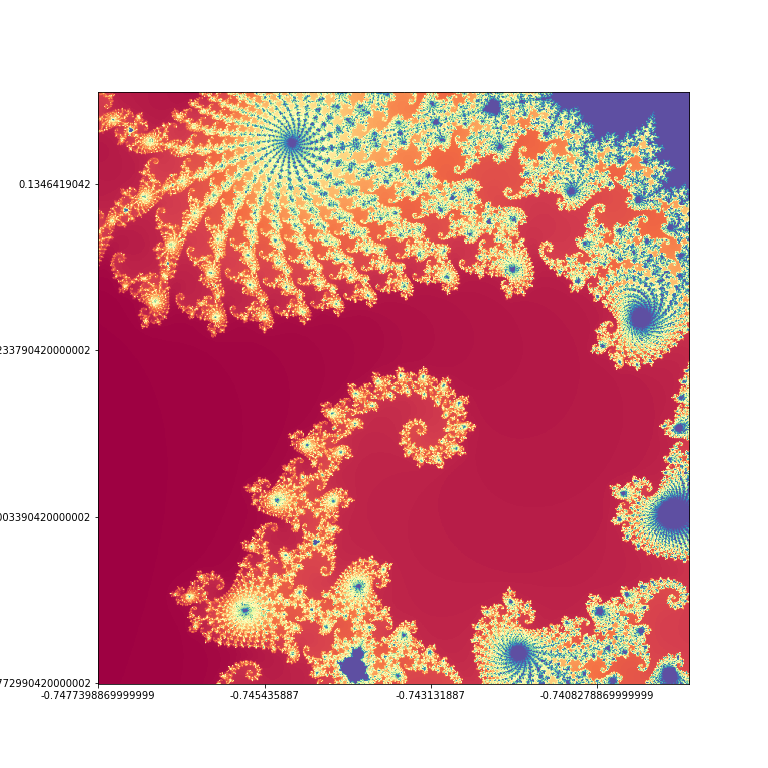

2021-09-20 00:29:44,938 [INFO] lithops.config -- Lithops v2.5.0
2021-09-20 00:29:44,947 [INFO] lithops.storage.backends.ibm_cos.ibm_cos -- IBM COS Storage client created - Region: eu-de
2021-09-20 00:29:46,390 [INFO] lithops.serverless.backends.ibm_cf.ibm_cf -- IBM CF client created - Region: eu-de - Namespace: ORGece1_ecespace1
2021-09-20 00:29:46,393 [INFO] lithops.invokers -- ExecutorID 284f91-14 | JobID M000 - Selected Runtime: lithopscloud/ibmcf-python-v38 - 256MB
2021-09-20 00:29:46,950 [INFO] lithops.invokers -- ExecutorID 284f91-14 | JobID M000 - Starting function invocation: cloud_process_wrapper() - Total: 16 activations
2021-09-20 00:29:46,986 [INFO] lithops.invokers -- ExecutorID 284f91-14 | JobID M000 - View execution logs at /tmp/lithops/logs/284f91-14-M000.log
2021-09-20 00:29:46,990 [INFO] lithops.wait -- ExecutorID 284f91-14 - Getting results from functions


    0%|          | 0/16  

2021-09-20 00:29:57,866 [INFO] lithops.executors -- ExecutorID 284f91-14 - Cleaning temporary data
2021-09-20 00:29:58,116 [INFO] lithops.config -- Lithops v2.5.0
2021-09-20 00:29:58,126 [INFO] lithops.storage.backends.ibm_cos.ibm_cos -- IBM COS Storage client created - Region: eu-de
2021-09-20 00:29:58,129 [INFO] lithops.serverless.backends.ibm_cf.ibm_cf -- IBM CF client created - Region: eu-de - Namespace: ORGece1_ecespace1
2021-09-20 00:29:58,130 [INFO] lithops.invokers -- ExecutorID 284f91-15 | JobID M000 - Selected Runtime: lithopscloud/ibmcf-python-v38 - 256MB
2021-09-20 00:29:58,455 [INFO] lithops.invokers -- ExecutorID 284f91-15 | JobID M000 - Starting function invocation: cloud_process_wrapper() - Total: 16 activations
2021-09-20 00:29:58,494 [INFO] lithops.invokers -- ExecutorID 284f91-15 | JobID M000 - View execution logs at /tmp/lithops/logs/284f91-15-M000.log
2021-09-20 00:29:58,500 [INFO] lithops.wait -- ExecutorID 284f91-15 - Getting results from functions


    0%|          | 0/16  

2021-09-20 00:30:02,461 [INFO] lithops.executors -- ExecutorID 284f91-15 - Cleaning temporary data
2021-09-20 00:30:02,766 [INFO] lithops.config -- Lithops v2.5.0
2021-09-20 00:30:02,776 [INFO] lithops.storage.backends.ibm_cos.ibm_cos -- IBM COS Storage client created - Region: eu-de
2021-09-20 00:30:02,780 [INFO] lithops.serverless.backends.ibm_cf.ibm_cf -- IBM CF client created - Region: eu-de - Namespace: ORGece1_ecespace1
2021-09-20 00:30:02,780 [INFO] lithops.invokers -- ExecutorID 284f91-16 | JobID M000 - Selected Runtime: lithopscloud/ibmcf-python-v38 - 256MB
2021-09-20 00:30:03,105 [INFO] lithops.invokers -- ExecutorID 284f91-16 | JobID M000 - Starting function invocation: cloud_process_wrapper() - Total: 16 activations
2021-09-20 00:30:03,148 [INFO] lithops.invokers -- ExecutorID 284f91-16 | JobID M000 - View execution logs at /tmp/lithops/logs/284f91-16-M000.log
2021-09-20 00:30:03,153 [INFO] lithops.wait -- ExecutorID 284f91-16 - Getting results from functions


    0%|          | 0/16  

2021-09-20 00:30:08,598 [INFO] lithops.executors -- ExecutorID 284f91-16 - Cleaning temporary data
2021-09-20 00:30:08,968 [INFO] lithops.config -- Lithops v2.5.0
2021-09-20 00:30:08,978 [INFO] lithops.storage.backends.ibm_cos.ibm_cos -- IBM COS Storage client created - Region: eu-de
2021-09-20 00:30:08,982 [INFO] lithops.serverless.backends.ibm_cf.ibm_cf -- IBM CF client created - Region: eu-de - Namespace: ORGece1_ecespace1
2021-09-20 00:30:08,983 [INFO] lithops.invokers -- ExecutorID 284f91-17 | JobID M000 - Selected Runtime: lithopscloud/ibmcf-python-v38 - 256MB
2021-09-20 00:30:09,326 [INFO] lithops.invokers -- ExecutorID 284f91-17 | JobID M000 - Starting function invocation: cloud_process_wrapper() - Total: 16 activations
2021-09-20 00:30:09,366 [INFO] lithops.invokers -- ExecutorID 284f91-17 | JobID M000 - View execution logs at /tmp/lithops/logs/284f91-17-M000.log
2021-09-20 00:30:09,371 [INFO] lithops.wait -- ExecutorID 284f91-17 - Getting results from functions


    0%|          | 0/16  

2021-09-20 00:30:13,412 [INFO] lithops.executors -- ExecutorID 284f91-17 - Cleaning temporary data
2021-09-20 00:30:13,848 [INFO] lithops.config -- Lithops v2.5.0
2021-09-20 00:30:13,863 [INFO] lithops.storage.backends.ibm_cos.ibm_cos -- IBM COS Storage client created - Region: eu-de
2021-09-20 00:30:13,866 [INFO] lithops.serverless.backends.ibm_cf.ibm_cf -- IBM CF client created - Region: eu-de - Namespace: ORGece1_ecespace1
2021-09-20 00:30:13,867 [INFO] lithops.invokers -- ExecutorID 284f91-18 | JobID M000 - Selected Runtime: lithopscloud/ibmcf-python-v38 - 256MB
2021-09-20 00:30:14,276 [INFO] lithops.invokers -- ExecutorID 284f91-18 | JobID M000 - Starting function invocation: cloud_process_wrapper() - Total: 16 activations
2021-09-20 00:30:14,296 [INFO] lithops.invokers -- ExecutorID 284f91-18 | JobID M000 - View execution logs at /tmp/lithops/logs/284f91-18-M000.log
2021-09-20 00:30:14,298 [INFO] lithops.wait -- ExecutorID 284f91-18 - Getting results from functions


    0%|          | 0/16  

2021-09-20 00:30:17,977 [INFO] lithops.executors -- ExecutorID 284f91-18 - Cleaning temporary data
2021-09-20 00:30:18,488 [INFO] lithops.config -- Lithops v2.5.0
2021-09-20 00:30:18,498 [INFO] lithops.storage.backends.ibm_cos.ibm_cos -- IBM COS Storage client created - Region: eu-de
2021-09-20 00:30:18,502 [INFO] lithops.serverless.backends.ibm_cf.ibm_cf -- IBM CF client created - Region: eu-de - Namespace: ORGece1_ecespace1
2021-09-20 00:30:18,502 [INFO] lithops.invokers -- ExecutorID 284f91-19 | JobID M000 - Selected Runtime: lithopscloud/ibmcf-python-v38 - 256MB
2021-09-20 00:30:18,901 [INFO] lithops.invokers -- ExecutorID 284f91-19 | JobID M000 - Starting function invocation: cloud_process_wrapper() - Total: 16 activations
2021-09-20 00:30:18,945 [INFO] lithops.invokers -- ExecutorID 284f91-19 | JobID M000 - View execution logs at /tmp/lithops/logs/284f91-19-M000.log
2021-09-20 00:30:18,950 [INFO] lithops.wait -- ExecutorID 284f91-19 - Getting results from functions


    0%|          | 0/16  

2021-09-20 00:30:23,408 [INFO] lithops.executors -- ExecutorID 284f91-19 - Cleaning temporary data
2021-09-20 00:30:24,068 [INFO] lithops.config -- Lithops v2.5.0
2021-09-20 00:30:24,079 [INFO] lithops.storage.backends.ibm_cos.ibm_cos -- IBM COS Storage client created - Region: eu-de
2021-09-20 00:30:24,083 [INFO] lithops.serverless.backends.ibm_cf.ibm_cf -- IBM CF client created - Region: eu-de - Namespace: ORGece1_ecespace1
2021-09-20 00:30:24,083 [INFO] lithops.invokers -- ExecutorID 284f91-20 | JobID M000 - Selected Runtime: lithopscloud/ibmcf-python-v38 - 256MB
2021-09-20 00:30:24,388 [INFO] lithops.invokers -- ExecutorID 284f91-20 | JobID M000 - Starting function invocation: cloud_process_wrapper() - Total: 16 activations
2021-09-20 00:30:24,422 [INFO] lithops.invokers -- ExecutorID 284f91-20 | JobID M000 - View execution logs at /tmp/lithops/logs/284f91-20-M000.log
2021-09-20 00:30:24,424 [INFO] lithops.wait -- ExecutorID 284f91-20 - Getting results from functions


    0%|          | 0/16  

2021-09-20 00:30:30,631 [INFO] lithops.executors -- ExecutorID 284f91-20 - Cleaning temporary data


In [9]:
width = height = 768
maxiter = 300
concurrency = 16  # number of functions executed in parallel
xtarget = -0.7436438870
ytarget = 0.1318259042

# Initialize plot
fig, ax = create_subplots(width, height)

# Initial rectangle position
delta = 1
xmin = xtarget - delta
xmax = xtarget + delta
ymin = ytarget - delta
ymax = ytarget + delta

mat = parallel_mandelbrot(xmin, xmax, ymin, ymax, width, height, maxiter, concurrency)
plot_matrix(mat, fig, ax, xmin, xmax, ymin, ymax, width, height)

 # 1st zoom
delta = 0.4
xmin = xtarget - delta
xmax = xtarget + delta
ymin = ytarget - delta
ymax = ytarget + delta
mat = parallel_mandelbrot(xmin, xmax, ymin, ymax, width, height, maxiter, concurrency)
plot_matrix(mat, fig, ax, xmin, xmax, ymin, ymax, width, height)

# 2nd zoom
delta *= 0.4
xmin = xtarget - delta
xmax = xtarget + delta
ymin = ytarget - delta
ymax = ytarget + delta
maxiter += 30
mat = parallel_mandelbrot(xmin, xmax, ymin, ymax, width, height, maxiter, concurrency)
plot_matrix(mat, fig, ax, xmin, xmax, ymin, ymax, width, height)

# 3rd zoom
delta *= 0.4
xmin = xtarget - delta
xmax = xtarget + delta
ymin = ytarget - delta
ymax = ytarget + delta
maxiter += 30
mat = parallel_mandelbrot(xmin, xmax, ymin, ymax, width, height, maxiter, concurrency)
plot_matrix(mat, fig, ax, xmin, xmax, ymin, ymax, width, height)

# 4th zoom
delta *= 0.4
xmin = xtarget - delta
xmax = xtarget + delta
ymin = ytarget - delta
ymax = ytarget + delta
maxiter += 40
mat = parallel_mandelbrot(xmin, xmax, ymin, ymax, width, height, maxiter, concurrency)
plot_matrix(mat, fig, ax, xmin, xmax, ymin, ymax, width, height)

# 5th zoom
delta *= 0.4
xmin = xtarget - delta
xmax = xtarget + delta
ymin = ytarget - delta
ymax = ytarget + delta
maxiter += 40
mat = parallel_mandelbrot(xmin, xmax, ymin, ymax, width, height, maxiter, concurrency)
plot_matrix(mat, fig, ax, xmin, xmax, ymin, ymax, width, height)

# 6th zoom
delta *= 0.4
xmin = xtarget - delta
xmax = xtarget + delta
ymin = ytarget - delta
ymax = ytarget + delta
maxiter = 500
mat = parallel_mandelbrot(xmin, xmax, ymin, ymax, width, height, maxiter, concurrency)
plot_matrix(mat, fig, ax, xmin, xmax, ymin, ymax, width, height)
